<a href="https://colab.research.google.com/github/praharshithapanthangi/IDP_PROJECT_2/blob/main/IDP_CODE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd  # Import pandas

# Load datasets
app_record = pd.read_csv('/content/application_record.csv')
credit_record = pd.read_csv('/content/credit_record.csv')

# Check if the datasets loaded correctly
print(app_record.head())
print(credit_record.head())


        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [ ]:
# Display the first few rows of each dataset
print(app_record.head())
print(credit_record.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [ ]:
# Creating subplots for distributions of various features exploratory data analysis
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=('Gender', 'Income', 'Education Level', 'Family Status', 'Housing Type', 'Age', 'Years Employed')
)

# Gender Distribution
gender_fig = px.histogram(app_record, x='CODE_GENDER', color='CODE_GENDER', title='Gender Distribution',
                          color_discrete_sequence=px.colors.qualitative.Pastel, template='plotly_dark').data[0]
fig.add_trace(gender_fig, row=1, col=1)

# Income Distribution
income_fig = px.histogram(app_record, x='AMT_INCOME_TOTAL', nbins=50, title='Income Distribution',
                          color_discrete_sequence=['#00CC96'], template='plotly_dark').data[0]
fig.add_trace(income_fig, row=1, col=2)

# Education Level Distribution
education_fig = px.histogram(app_record, x='NAME_EDUCATION_TYPE', title='Education Level Distribution',
                             color='NAME_EDUCATION_TYPE', color_discrete_sequence=px.colors.qualitative.Set2, template='plotly_dark').data[0]
fig.add_trace(education_fig, row=1, col=3)

# Family Status Distribution
family_fig = px.histogram(app_record, x='NAME_FAMILY_STATUS', title='Family Status Distribution',
                          color='NAME_FAMILY_STATUS', color_discrete_sequence=px.colors.qualitative.Vivid, template='plotly_dark').data[0]
fig.add_trace(family_fig, row=2, col=1)

# Housing Type Distribution
housing_fig = px.histogram(app_record, x='NAME_HOUSING_TYPE', title='Housing Type Distribution',
                           color='NAME_HOUSING_TYPE', color_discrete_sequence=px.colors.qualitative.Alphabet, template='plotly_dark').data[0]
fig.add_trace(housing_fig, row=2, col=2)

# Age Distribution
app_record['AGE'] = app_record['DAYS_BIRTH'] // -365
age_fig = px.histogram(app_record, x='AGE', nbins=50, title='Age Distribution',
                       color_discrete_sequence=['#FFA15A'], template='plotly_dark').data[0]
fig.add_trace(age_fig, row=2, col=3)

# Years Employed Distribution
app_record['YEARS_EMPLOYED'] = app_record['DAYS_EMPLOYED'] // -365
employed_fig = px.histogram(app_record, x='YEARS_EMPLOYED', nbins=50, title='Years Employed Distribution',
                            color_discrete_sequence=['#AB63FA'], template='plotly_dark').data[0]
fig.add_trace(employed_fig, row=3, col=1)

fig.update_layout(height=900, width=900, title_text='Distributions of Various Features', title_font_size=24, title_x=0.5)
fig.show()

In [ ]:

# income vs. age colored by gender
scatter_fig = px.scatter(app_record, x='AGE', y='AMT_INCOME_TOTAL', color='CODE_GENDER',
                         title='Income vs. Age by Gender', color_discrete_sequence=px.colors.qualitative.Pastel, template='plotly_dark')
scatter_fig.update_layout(title_font_size=20, title_x=0.5, xaxis_title='Age', yaxis_title='Income')
scatter_fig.show()

In [ ]:
# Income by family status
box_fig = px.box(app_record, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', color='NAME_FAMILY_STATUS',
                 title='Income by Family Status', color_discrete_sequence=px.colors.qualitative.Vivid, template='plotly_dark')
box_fig.update_layout(title_font_size=20, title_x=0.5, xaxis_title='Family Status', yaxis_title='Income')
box_fig.show()

In [ ]:
# Heatmap of correlation matrix
numerical_cols = app_record.select_dtypes(include=[np.number]).columns
correlation_matrix = app_record[numerical_cols].corr()

# Create the heatmap figure
heatmap_fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
    zmin=-1, zmax=1,  # Setting color scale range
    showscale=True  # Display color scale
))

# Add annotations to the heatmap
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                text=str(round(value, 2)),
                x=correlation_matrix.columns[j],
                y=correlation_matrix.columns[i],
                xref='x1', yref='y1',
                font=dict(color='black', size=12),
                showarrow=False
            )
        )

heatmap_fig.update_layout(
    title='Correlation Matrix',
    xaxis_nticks=36,
    template='plotly_dark',
    annotations=annotations  # Add annotations to the layout
)

heatmap_fig.show()

In [ ]:
# Preprocessing
# Merge datasets on ID
merged_df = pd.merge(app_record, credit_record, on='ID')

In [ ]:
# Create a new column to classify clients as 'good' or 'bad' based on STATUS
def classify_client(status):
    if status in ['2', '3', '4', '5']:
        return 'bad'
    else:
        return 'good'

merged_df['client_status'] = merged_df['STATUS'].apply(classify_client)

In [ ]:
# Label encoding for the target variable
label_encoder = LabelEncoder()
merged_df['client_status'] = label_encoder.fit_transform(merged_df['client_status'])

In [ ]:
# Drop columns that won't be used
merged_df.drop(columns=['ID', 'STATUS', 'MONTHS_BALANCE'], inplace=True)

In [ ]:
# Encode categorical variables
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df = pd.get_dummies(merged_df, columns=categorical_cols, drop_first=True)

In [ ]:
# Handle missing values
merged_df.fillna(merged_df.median(), inplace=True)

In [ ]:
# Split data into features and target variable
X = merged_df.drop(columns=['client_status'])
y = merged_df['client_status']

In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_log_reg

0.6503427916955687

Confusion Matrix:
[[ 93956  61469]
 [ 46909 107621]]


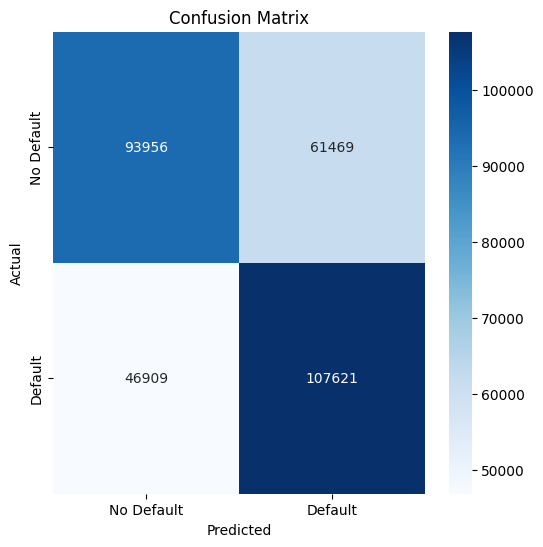

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already split your data into training and testing sets
# and trained the Logistic Regression model
# X_train, X_test, y_train, y_test are already defined

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)



# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already made predictions using Logistic Regression
# and the y_test and y_pred variables are available

# Generate classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63    155425
           1       0.64      0.70      0.67    154530

    accuracy                           0.65    309955
   macro avg       0.65      0.65      0.65    309955
weighted avg       0.65      0.65      0.65    309955



In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_clf

0.9825264957816457

In [ ]:
# Determine which model has higher accuracy
if accuracy_log_reg > accuracy_rf_clf:
    chosen_model = log_reg
    y_pred_chosen = y_pred_log_reg
    chosen_model_name = 'Logistic Regression'
else:
    chosen_model = rf_clf
    y_pred_chosen = y_pred_rf
    chosen_model_name = 'Random Forest Classifier'

In [ ]:
# Print the classification reports
print(f"{chosen_model_name} Classification Report:")
print(classification_report(y_test, y_pred_chosen))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    155425
           1       1.00      0.97      0.98    154530

    accuracy                           0.98    309955
   macro avg       0.98      0.98      0.98    309955
weighted avg       0.98      0.98      0.98    309955



In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, chosen_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Display ROC Curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{chosen_model_name} (AUC = {roc_auc:.2f})', line=dict(color='firebrick', width=2)))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', template='plotly_dark', title_font_size=20, title_x=0.5)
fig.show()

In [ ]:
# Count the number of 'default' and 'no default' instances
default_counts = merged_df['client_status'].value_counts()
print("Number of instances in each class:")
print("No Default:", default_counts[0])  # Assuming 0 represents 'no default'
print("Default:", default_counts[1])  # Assuming 1 represents 'default'


Number of instances in each class:
No Default: 2828
Default: 774887


In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_chosen)

# Define labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create an annotated heatmap
fig = ff.create_annotated_heatmap(cm,
                                  x=['Predicted 0', 'Predicted 1'],  # Predicted labels
                                  y=['Actual 0', 'Actual 1'],       # Actual labels
                                  colorscale='Viridis')  # Color scale

# Update the figure layout
fig.update_layout(
    title_text='Confusion Matrix',
    xaxis=dict(title='Predicted label'),
    yaxis=dict(title='True label')
)

# Display the confusion matrix
fig.show()


Number of instances predicted as each class:
No Default: 159631
Default: 150324


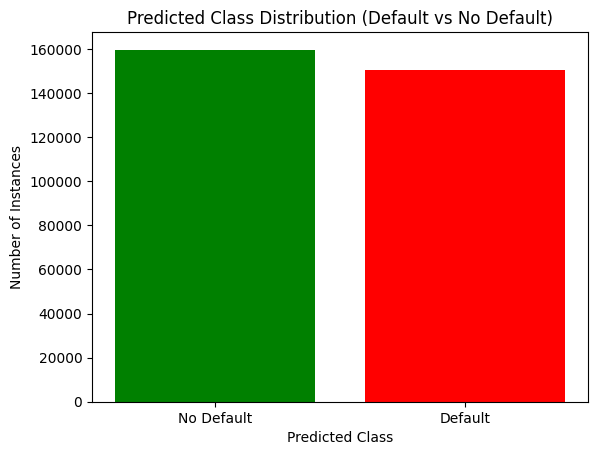

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Train the Logistic Regression or Random Forest model
# Assuming 'chosen_model' is the trained model (either LogisticRegression or RandomForestClassifier)
# and 'X_test' is the test set features

y_pred = chosen_model.predict(X_test)  # Make predictions on the test data

# Step 2: Count the number of 'default' and 'no default' predictions
default_counts = pd.Series(y_pred).value_counts()  # Count the predictions

# Print the counts of predicted 'default' and 'no default'
print("Number of instances predicted as each class:")
print("No Default:", default_counts.get(0, 0))  # If there are no 'no default' predictions
print("Default:", default_counts.get(1, 0))  # If there are no 'default' predictions

# Step 3: Create a bar plot for the predicted classes
labels = ['No Default', 'Default']
counts = [default_counts.get(0, 0), default_counts.get(1, 0)]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Predicted Class Distribution (Default vs No Default)')
plt.xlabel('Predicted Class')
plt.ylabel('Number of Instances')

# Display the plot
plt.show()


In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_clf.fit(X_train, y_train)

# Function to measure execution time and estimated instructions per second (IPS) on CPU
def measure_cpu_execution(model, X_test, batch_sizes):
    print("\n==== CPU Execution Analysis ====")
    for batch_size in batch_sizes:
        X_batch = X_test[:batch_size]

        start_time = time.time()
        _ = model.predict(X_batch)  # Making predictions
        end_time = time.time()

        elapsed_time = end_time - start_time
        num_operations = np.prod(X_batch.shape) * batch_size  # Estimated instructions

        ips = num_operations / elapsed_time if elapsed_time > 0 else 0
        print(f"Batch Size: {batch_size}, Time Taken: {elapsed_time:.6f} sec, Estimated IPS: {ips:.2e} instr/sec")

# Define batch sizes and run analysis
batch_sizes = [1, 32, 64, 128, 256]
measure_cpu_execution(rf_clf, X_test, batch_sizes)



==== CPU Execution Analysis ====
Batch Size: 1, Time Taken: 0.009758 sec, Estimated IPS: 4.92e+03 instr/sec
Batch Size: 32, Time Taken: 0.010526 sec, Estimated IPS: 4.67e+06 instr/sec
Batch Size: 64, Time Taken: 0.011198 sec, Estimated IPS: 1.76e+07 instr/sec
Batch Size: 128, Time Taken: 0.013447 sec, Estimated IPS: 5.85e+07 instr/sec
Batch Size: 256, Time Taken: 0.016770 sec, Estimated IPS: 1.88e+08 instr/sec


In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Ensure X_train and y_train are available
if 'X_train' not in locals() or 'y_train' not in locals():
    print("Error: X_train or y_train is missing. Ensure your dataset is loaded properly.")

# Initialize and Train RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)  # Train the model

# Ensure test data is in NumPy format
X_test_np = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

# Function to measure execution time on GPU
def measure_gpu_execution(model, X_test, batch_sizes):
    for batch_size in batch_sizes:
        X_batch = X_test[:batch_size]  # Use NumPy array
        start_time = time.time()
        _ = model.predict(X_batch)  # Perform prediction
        end_time = time.time()

        elapsed_time = end_time - start_time
        num_operations = X_batch.size * batch_size  # Estimate operations

        print(f"Batch Size: {batch_size}, Time Taken: {elapsed_time:.6f} sec, Estimated Instructions: {num_operations / elapsed_time:.2e} instr/sec")

# Define batch sizes
batch_sizes = [1, 32, 64, 128, 256]

# Run GPU execution analysis
print("\n==== Parallel Execution Analysis (GPU) ====")
measure_gpu_execution(rf_clf, X_test_np, batch_sizes)



==== Parallel Execution Analysis (GPU) ====
Batch Size: 1, Time Taken: 0.010648 sec, Estimated Instructions: 4.51e+03 instr/sec
Batch Size: 32, Time Taken: 0.008846 sec, Estimated Instructions: 5.56e+06 instr/sec
Batch Size: 64, Time Taken: 0.009788 sec, Estimated Instructions: 2.01e+07 instr/sec
Batch Size: 128, Time Taken: 0.010864 sec, Estimated Instructions: 7.24e+07 instr/sec
Batch Size: 256, Time Taken: 0.014195 sec, Estimated Instructions: 2.22e+08 instr/sec
